In [2]:
# imports 
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import requests 

from pathlib import Path
from bs4 import BeautifulSoup


from sklearn import metrics
from sklearn import linear_model
from matplotlib import cm

# decision tree and RandomForest
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


# **Crawling**
**By using BeautifulSoup and requests**

In [ ]:
filepath = Path('C:/Users/lusil/Desktop/outlinks.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

linksToPages = []
url1="https://www.hotel4u.co.il/"
response1 = requests.get(url1)

soup1 = BeautifulSoup(response1.content, "html.parser")
lst=soup1.findAll("li",attrs={"class":"main_list_item"})

    
for url in lst:
        for t in url("a"):
            linksToPages.append(t["href"])          
            
linksToPages.remove("https://www.hotel4u.co.il/hotels/israel-deals.asp")   #remove bad links

dfLinks = pd.DataFrame (linksToPages, columns = ['column_name'])

dfLinks.to_csv(filepath)

print(dfLinks)

Now, I'll save for each link (city or company) all links to the hotels(new file for each)


In [ ]:
linksToHotels = []
p = 'C:/Users/lusil/Desktop/links'
i = 97
for url in linksToPages:
    if(i == 123):
        i = 65
    elif(i == 91):
        i = 48
    ichar = chr(i)

    filepath1 = Path(p+ichar+'.csv')  
    filepath1.parent.mkdir(parents=True, exist_ok=True)  
    
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    lst1=soup.findAll("div",attrs={"class":"best-dill"})

    for u in lst1:
        for t in u("a"):
            if(t("span")):
                continue
            linksToHotels.append(t["href"])
            
    
    dfHotelsLinks = pd.DataFrame (linksToHotels, columns = ['links To Hotels'])
    dfHotelsLinks.to_csv(filepath1)
    i+=1

**I noticed that the links 'https://www.hotel4u.co.il/Deal.asp?Id=' and 'https://www.hotel4u.co.il/Organized-tours.asp?Id='
are advertisements for vacations abroad or a deal that may be invalid.**

Because there weren't many classes, I had to differentiate between the texts by myself,
I noticed that br = [] has 3 cells in the list that each is text.

I used the function **'in'** to search the relevant parameters in the text.

In [ ]:
pt = 'C:/Users/lusil/Desktop/links2/hotels'
pf = 'C:/Users/lusil/Desktop/links'
i = 97
link = 0
    
for link in range(36):
    if(i == 123):
        i = 48
    ichar = chr(i)

    filepath1 = Path(pt+ichar+'.csv')  
    filepath1.parent.mkdir(parents=True, exist_ok=True)
    
    df = pd.read_csv(pf+ichar+'.csv')
    
    Hotel_name = []
    resturnt = []
    spa = []
    Address = []
    num_of_swimming_pools = []
    wifi = []
    rating = []
    parking = []

    list = df.iloc[:,1]


    for url in list:
        br = []
        if('https://www.hotel4u.co.il/Deal.asp?Id=' in url):
            continue
        elif('https://www.hotel4u.co.il/Organized-tours.asp?Id=' in url):
            continue
            
        response1 = requests.get(url)
        soup1 = BeautifulSoup(response1.content, "html.parser")
    
        lst=soup1.find_all("td", style="font-size:15PX;color:#616161;text-decoration:none;padding-right:10px;")

        for t in lst:
            br.append(t.get_text())
        
        Address.append(br[2])

        if('בריכה' in br[0]):
            num_of_swimming_pools.append(1)
        elif('בריכה' in br[1]):
            num_of_swimming_pools.append(1)
        elif('בריכת' in br[1]):
            num_of_swimming_pools.append(1)
        elif('בריכות' in br[0]):
            num_of_swimming_pools.append(2)
        elif('בריכות' in br[1]):
            num_of_swimming_pools.append(2)
        else:
            num_of_swimming_pools.append(0)
    
        if('אינטרנט' in br[0]):
            wifi.append(1)
        elif('אינטרנט' in br[1]):
            wifi.append(1)
        else:
            wifi.append(0)

        if('סעד' in br[0]):
            resturnt.append(1)
        elif('סעד' in br[1]):
            resturnt.append(1)
        else:
            resturnt.append(0)
        
        if('חניה' in br[0]):
            parking.append(1)
        elif('חניה' in br[0]):
            parking.append(1)
        elif('חנייה' in br[1]):
            parking.append(1)
        else:
            parking.append(0)
        
        if('ספא' in br[0]):
            spa.append(1)
        elif('ספא' in br[1]):
            spa.append(1)
        elif('סאונה' in br[0]):
            spa.append(1)
        elif('סאונה' in br[1]):
            spa.append(1)
        else:
            spa.append(0)

        NameH=soup1.find("td", style="font-size:21PX;color:#920002;font-weight:bold;direction:rtl;")
        Hotel_name.append(NameH.get_text())

        RateH=soup1.find("a", style="cursor:pointer;cursor:hand;")
        rating.append(RateH.get_text())
    

    dict = {'Hotel Name': Hotel_name, 'Address': Address, 'Spa': spa, 'wifi': wifi,
            'num of swimming pools': num_of_swimming_pools,'Parking': parking, 'Rate': rating}

    df0 = pd.DataFrame(dict)
    df0.to_csv(filepath1)
    link+=1
    i+=1

In [ ]:
pt = 'C:/Users/lusil/Desktop/links2/AllHotels.csv'
pf = 'C:/Users/lusil/Desktop/links2/hotels'
i = 97
link = 0
    
for link in range(36):
    if(i == 123):
        i = 48
    ichar = chr(i)

    filepath1 = Path(pt)  
    filepath1.parent.mkdir(parents=True, exist_ok=True)
    

    if(link == 0):
        MixDF = pd.read_csv(pf+ichar+'.csv')
    else:
        df = pd.read_csv(pf+ichar+'.csv')
        MixDF = pd.concat([MixDF, df], ignore_index=True)

    link+=1
    i+=1
MixDF.drop(['Unnamed: 0'], axis=1,inplace=True)
MixDF.to_csv(filepath1)
MixDF

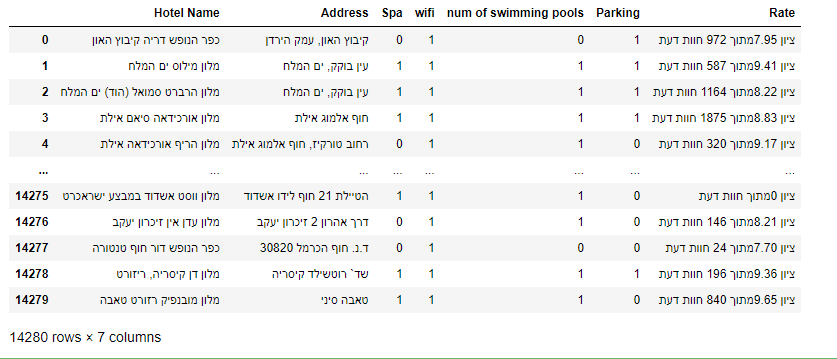

Now, I will separate the **"Rate"** column into two columns: **"Rate", "num of reviews"**

In [5]:
num_of_reviews = []

new = MixDF["Rate"].str.split("מתוך", n = 1, expand = True)

MixDF["Rate"]= new[0]
MixDF["num of reviews"]= new[1]
MixDF.drop(['Unnamed: 0'], axis=1,inplace=True)

MixDF = MixDF.replace('ציון','', regex=True)
MixDF = MixDF.replace('חוות דעת','', regex=True)

MixDF.to_csv('C:/Users/lusil/Desktop/links2/AllHotels.csv')
MixDF

,Hotel Name,Address,Spa,wifi,num of swimming pools,Parking,Rate,num of reviews
0,כפר הנופש דריה קיבוץ האון,"קיבוץ האון, עמק הירדן",0,1,0,1,7.95,972
1,מלון מילוס ים המלח,"עין בוקק, ים המלח",1,1,1,1,9.41,587
2,מלון הרברט סמואל (הוד) ים המלח,"עין בוקק, ים המלח",1,1,1,1,8.22,1164
3,מלון אורכידאה סיאם אילת,חוף אלמוג אילת,1,1,1,1,8.83,1875
4,מלון הריף אורכידאה אילת,"רחוב טורקיז, חוף אלמוג אילת",0,1,1,0,9.17,320
...,...,...,...,...,...,...,...,...
14275,מלון ווסט אשדוד במבצע ישראכרט,הטיילת 21 חוף לידו אשדוד,1,1,1,0,0.00,
14276,מלון עדן אין זיכרון יעקב,דרך אהרון 2 זיכרון יעקב,0,1,1,0,8.21,146
14277,כפר הנופש דור חוף טנטורה,ד.נ. חוף הכרמל 30820,0,1,0,0,7.70,24
14278,"מלון דן קיסריה, ריזורט",שד` רוטשילד קיסריה,1,1,1,1,9.36,196


# Data Cleaning

### Each hotel with a rating of 0 is deleted from the DF

In [ ]:
mix = MixDF.copy()
mix['Rate'] = pd.to_numeric(mix['Rate'])
mix = mix.drop(mix[(mix.Rate == 0)].index)
mix.reset_index(drop=True, inplace=True)
mix

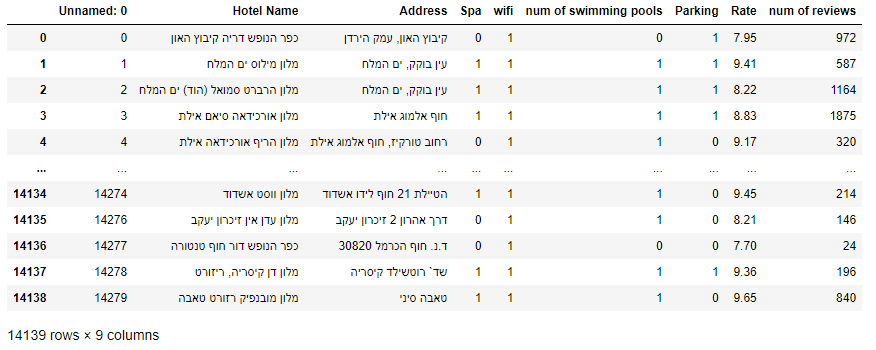

### Each hotel with a "במבצע" in the name is deleted from the DF
It is a duplicate row with other name

In [ ]:
mix = mix[mix["Hotel Name"].str.contains("במבצע") == False]

mix.reset_index(drop=True, inplace=True)
mix

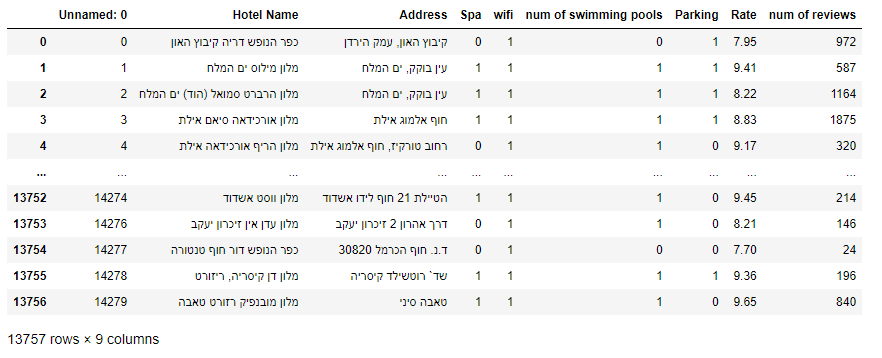

### If the hotel doesn't have any of the parameters - it is deleted from the DF

In [ ]:
mix['Spa'] = pd.to_numeric(mix['Spa'])
mix['wifi'] = pd.to_numeric(mix['wifi'])
mix['num of swimming pools'] = pd.to_numeric(mix['num of swimming pools'])
mix['Parking'] = pd.to_numeric(mix['Parking'])
mix['num of reviews'] = pd.to_numeric(mix['num of reviews'])

mix = mix.drop(mix[(mix['Spa'] == 0) & (mix['wifi'] == 0) & (mix['num of swimming pools'] == 0) & (mix['Parking'] == 0)].index)
mix.reset_index(drop=True, inplace=True)

mix.to_csv('C:/Users/lusil/Desktop/links2/HotelsAfterDrop.csv')
mix

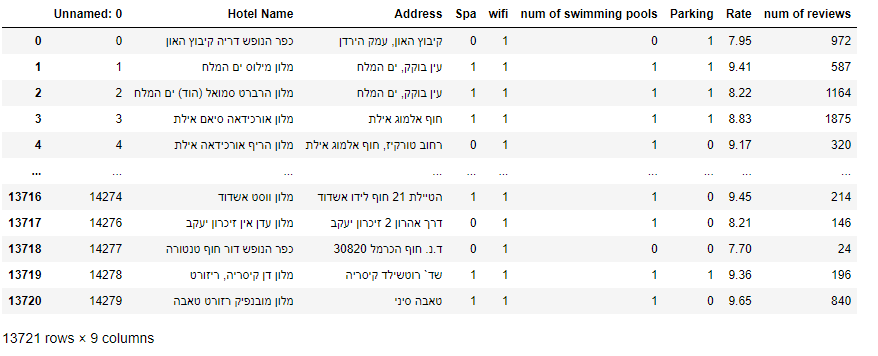

### Now, Added 3 new columns, Their purposes are:

1. **'Sum Parameters'** - Counting the parameters for each hotel
2. **'New Rate'** - Creating a new rate calculate which considerd the "num of reviews" and "Sum Parameters"
3. **'UnRate'** = Creating groups of "New Rate"

In [7]:
mix['New Rate'] = (mix['Rate']/10) * mix['num of reviews']      ## Creating a new rate which considerd the "num of reviews"

UnRate = []

mix['Sum Parameters'] = mix['Spa'] + mix['wifi'] + mix['num of swimming pools'] + mix['Parking']
mix['Sum Parameters'] = pd.to_numeric(mix['Sum Parameters'])
    
mix['New Rate'] = mix['New Rate'] * ((mix['Sum Parameters'] / 4)+1)      ## The rate is considerd the parameters

for i in mix['New Rate']:
    if(i < 300):
        UnRate.append('0-300')
    elif(i < 500):
        UnRate.append('300-500')
    elif(i < 700):
        UnRate.append('500-700')
    elif(i < 1000):
        UnRate.append('700-1000')
    elif(i < 1300):
        UnRate.append('1000-1300')
    else:
        UnRate.append('1300+')
mix['UnRate'] = UnRate                                      ###Groups of Rates

mix.to_csv('C:/Users/lusil/Desktop/links2/HotelsAfterDrop.csv')
mix

,Unnamed: 0,Hotel Name,Address,Spa,wifi,num of swimming pools,Parking,Rate,num of reviews,New Rate,Sum Parameters,UnRate
0,0,כפר הנופש דריה קיבוץ האון,"קיבוץ האון, עמק הירדן",0,1,0,1,7.95,972,1159.1100,2,1000-1300
1,1,מלון מילוס ים המלח,"עין בוקק, ים המלח",1,1,1,1,9.41,587,1104.7340,4,1000-1300
2,2,מלון הרברט סמואל (הוד) ים המלח,"עין בוקק, ים המלח",1,1,1,1,8.22,1164,1913.6160,4,1300+
3,3,מלון אורכידאה סיאם אילת,חוף אלמוג אילת,1,1,1,1,8.83,1875,3311.2500,4,1300+
4,4,מלון הריף אורכידאה אילת,"רחוב טורקיז, חוף אלמוג אילת",0,1,1,0,9.17,320,440.1600,2,300-500
...,...,...,...,...,...,...,...,...,...,...,...,...
13716,13716,מלון ווסט אשדוד,הטיילת 21 חוף לידו אשדוד,1,1,1,0,9.45,214,353.9025,3,300-500
13717,13717,מלון עדן אין זיכרון יעקב,דרך אהרון 2 זיכרון יעקב,0,1,1,0,8.21,146,179.7990,2,0-300
13718,13718,כפר הנופש דור חוף טנטורה,ד.נ. חוף הכרמל 30820,0,1,0,0,7.70,24,23.1000,1,0-300
13719,13719,"מלון דן קיסריה, ריזורט",שד` רוטשילד קיסריה,1,1,1,1,9.36,196,366.9120,4,300-500


# **EDA & Visualization**

Text(0.5, 1.0, 'Split Hotels To Rates')

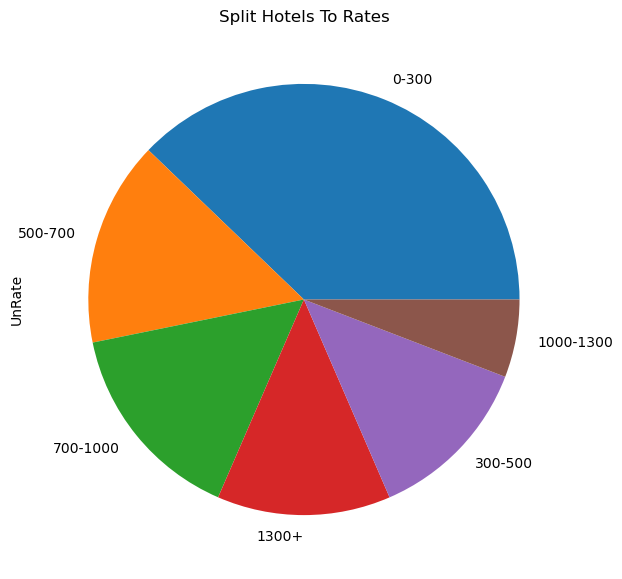

In [8]:
fig = plt.figure(figsize=(7,7))
mix["UnRate"].value_counts().plot(kind = 'pie')
plt.title('Split Hotels To Rates')

<AxesSubplot:xlabel='UnRate'>

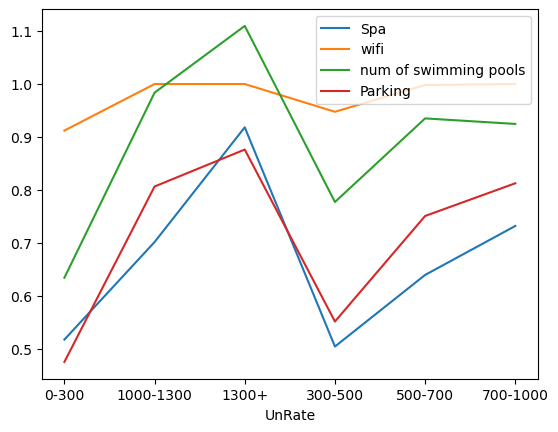

In [9]:
hotels = mix.groupby(["UnRate"]).mean()[['Spa', 'wifi', 'num of swimming pools', 'Parking']]
hotels.plot()

In [11]:
mix.drop(['Unnamed: 0'], axis=1,inplace=True)
mix.to_csv('C:/Users/lusil/Desktop/links2/HotelsAfterDrop.csv')
mix

,Hotel Name,Address,Spa,wifi,num of swimming pools,Parking,Rate,num of reviews,New Rate,Sum Parameters,UnRate
0,כפר הנופש דריה קיבוץ האון,"קיבוץ האון, עמק הירדן",0,1,0,1,7.95,972,1159.1100,2,1000-1300
1,מלון מילוס ים המלח,"עין בוקק, ים המלח",1,1,1,1,9.41,587,1104.7340,4,1000-1300
2,מלון הרברט סמואל (הוד) ים המלח,"עין בוקק, ים המלח",1,1,1,1,8.22,1164,1913.6160,4,1300+
3,מלון אורכידאה סיאם אילת,חוף אלמוג אילת,1,1,1,1,8.83,1875,3311.2500,4,1300+
4,מלון הריף אורכידאה אילת,"רחוב טורקיז, חוף אלמוג אילת",0,1,1,0,9.17,320,440.1600,2,300-500
...,...,...,...,...,...,...,...,...,...,...,...
13716,מלון ווסט אשדוד,הטיילת 21 חוף לידו אשדוד,1,1,1,0,9.45,214,353.9025,3,300-500
13717,מלון עדן אין זיכרון יעקב,דרך אהרון 2 זיכרון יעקב,0,1,1,0,8.21,146,179.7990,2,0-300
13718,כפר הנופש דור חוף טנטורה,ד.נ. חוף הכרמל 30820,0,1,0,0,7.70,24,23.1000,1,0-300
13719,"מלון דן קיסריה, ריזורט",שד` רוטשילד קיסריה,1,1,1,1,9.36,196,366.9120,4,300-500


<AxesSubplot:xlabel='New Rate', ylabel='Sum Parameters'>

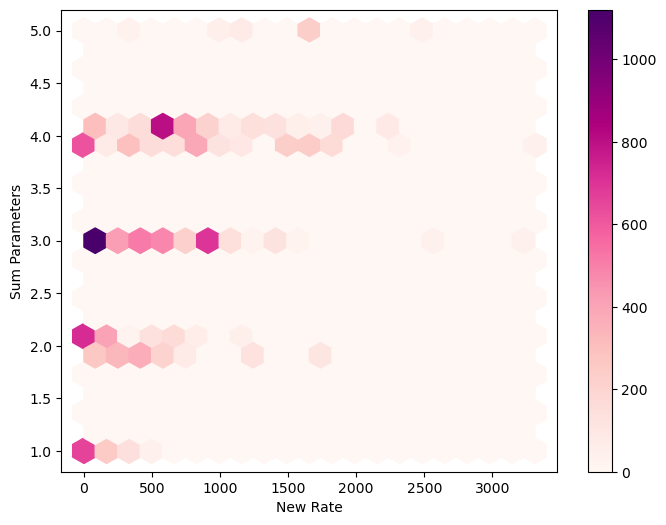

In [12]:
mix.plot.hexbin(x='New Rate', y='Sum Parameters', gridsize=20, cmap="RdPu" ,figsize=(8,6))

C:\Users\lusil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spa', ylabel='New Rate'>

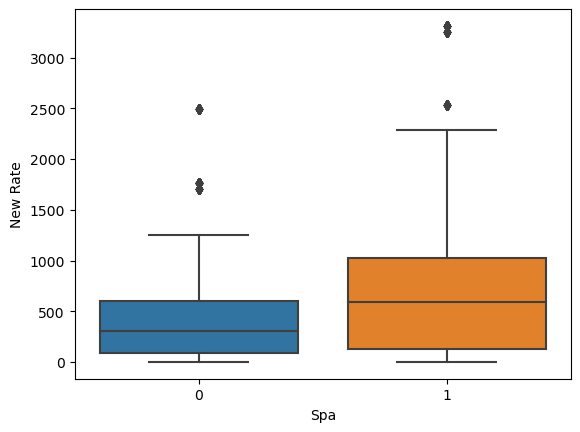

In [14]:
sns.boxplot(mix['Spa'],mix['New Rate'])

C:\Users\lusil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wifi', ylabel='New Rate'>

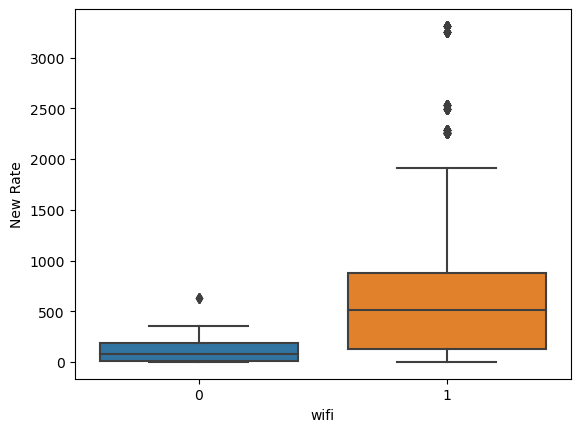

In [15]:
sns.boxplot(mix['wifi'],mix['New Rate'])

C:\Users\lusil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parking', ylabel='New Rate'>

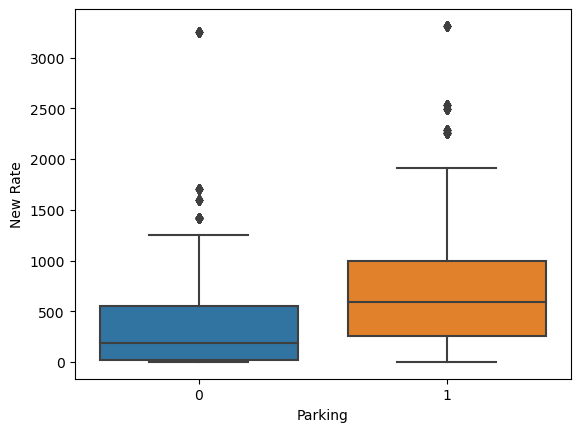

In [16]:
sns.boxplot(mix['Parking'],mix['New Rate'])

C:\Users\lusil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num of swimming pools', ylabel='New Rate'>

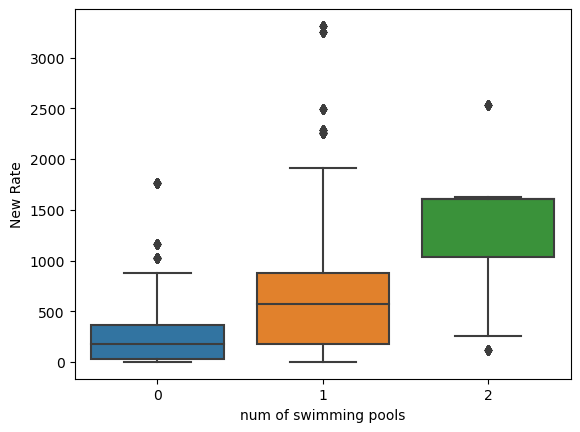

In [17]:
sns.boxplot(mix['num of swimming pools'],mix['New Rate'])

In [18]:
sum(mix['New Rate'] > 1500)

1375

In [20]:
sum(mix['New Rate'] == 1500)    ## Before Replacing

0

In [ ]:
### Replace all OUTLIERS to rate 1500

mask = mix['New Rate'][(mix['New Rate']> 1500)]
mix.loc[mask, 'New Rate'] = 1500

In [ ]:
sum(mix['New Rate'] == 1500)    ## After Replacing

### **After removing outliers:**

In [ ]:
sns.boxplot(mix['Parking'],mix['New Rate'])

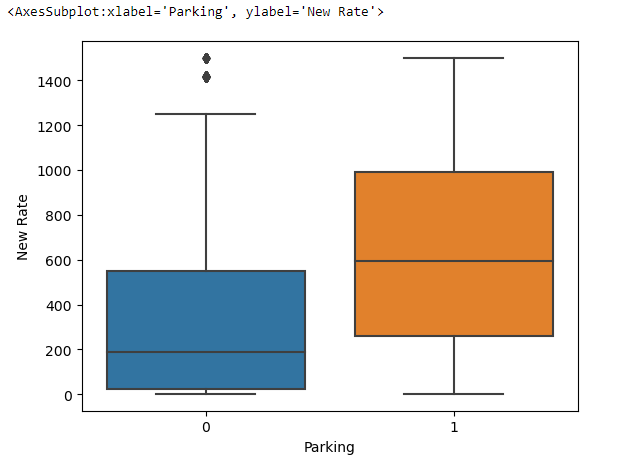

In [ ]:
sns.boxplot(mix['num of swimming pools'],mix['New Rate'])

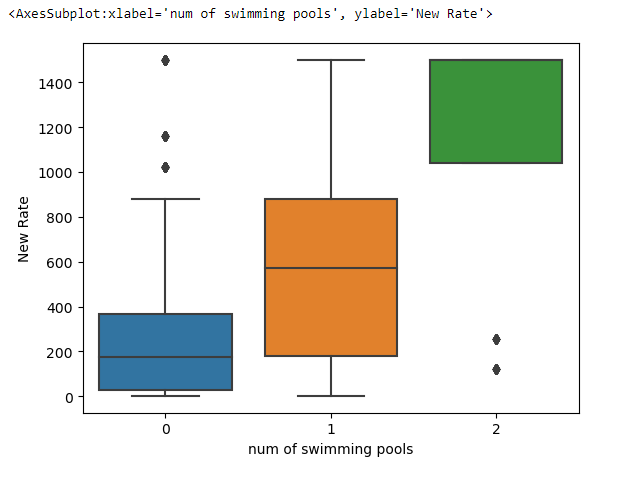

In [ ]:
sns.boxplot(mix['Spa'],mix['New Rate'])

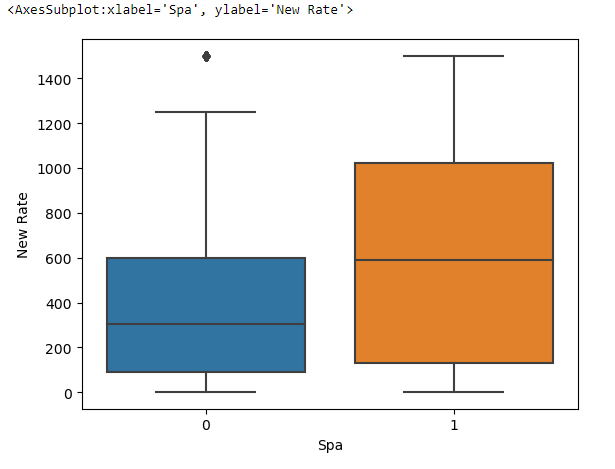

In [ ]:
sns.boxplot(mix['wifi'],mix['New Rate'])

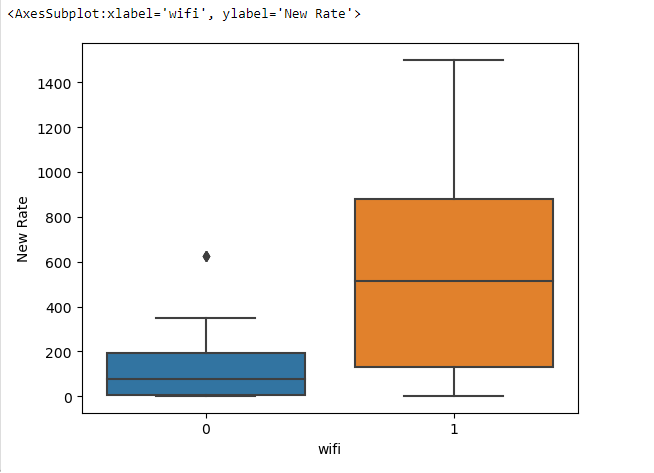

In [ ]:
mix.plot.hexbin(x='New Rate', y='Sum Parameters', gridsize=20, cmap="RdPu" ,figsize=(8,6))

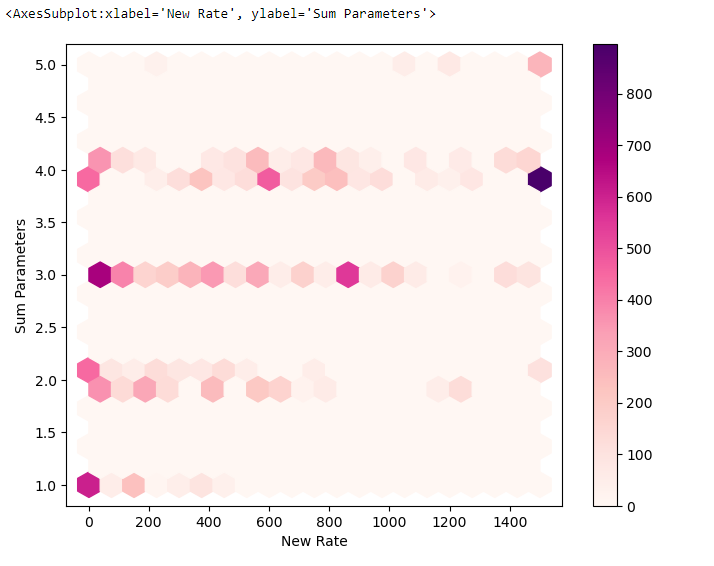

# **Machine Learning**

#### **I'll build 3 models:**
1. **LogisticRegression**
2. **DecisionTreeClassifier**
3. **RandomForestClassifier**

But we will make some changes in the DF before..

In [ ]:
mix['num of swimming pools'] = pd.to_numeric(mix['num of swimming pools'])

## Replacing 2 value (2 swimming pools) to 1 - from now, it is "has swimming pool or not? 0 / 1"

mask = mix['num of swimming pools'][(mix['num of swimming pools']== 2)]
mix.loc[mask].at['num of swimming pools'] = 1

**Adding another column - 'Sum binary'** - 
if the hotel has 1 or 2 parameters, it's 0
if the hotel has 3 or 4 parameters, it's 1

In [ ]:
Sumbinary = []
for i in mix['Sum Parameters']:
    if(i <= 2):
        Sumbinary.append(0)
    else:
        Sumbinary.append(1)
        
    
mix['Sum binary'] = Sumbinary

mix['Sum binary'] = pd.to_numeric(mix['Sum binary'])

mix.to_csv('C:/Users/lusil/Desktop/links2/HotelsAfterDrop2.csv')
mix

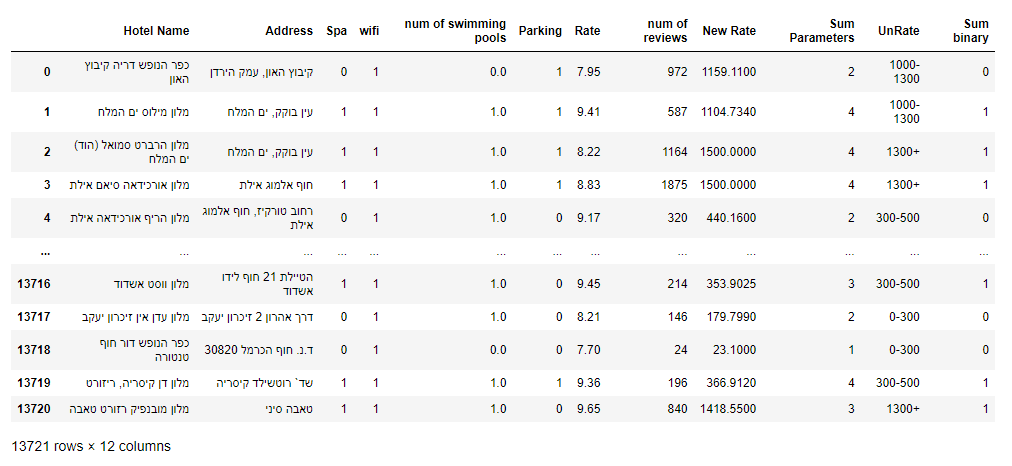

### **Build Logistic regression model**

In [ ]:

m=linear_model.LogisticRegression().fit(mix[['Rate']],mix[['Sum binary']])

mix.plot.scatter(x='Rate',y='Sum binary',s=30)

#create a set of points along the x axis to print prediction graph
x = np.linspace(mix['Rate'].min(),mix['Rate'].max())

y_pred_p=m.predict_proba(np.reshape(x, (-1, 1))) 
    
y_pred_p1=[y[1] for y in y_pred_p]

#plot the prediction graph
plt.plot(x,y_pred_p1,color='green')

plt.plot(x,[0.5]*len(x),color="red")

plt.xlabel('Rate')
plt.ylabel('Sum of params in binary: 0- 1/2 , 1- 3/4 ')
plt.show()

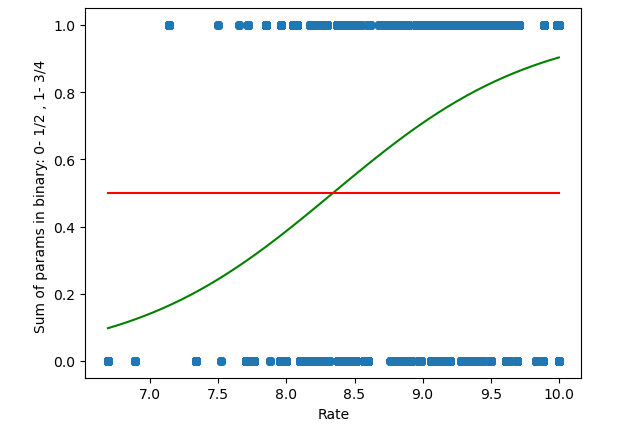

In [ ]:
y_pred = m.predict(mix[["Rate"]])
y_actual=mix["Sum binary"]

In [ ]:
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred))
print("recall is:",metrics.recall_score(y_actual, y_pred))
print("f1 is:",metrics.f1_score(y_actual, y_pred))

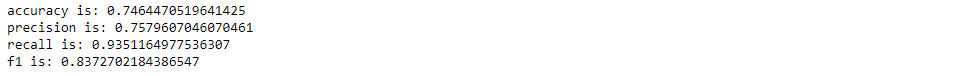

### **Build Decision Tree model**

**splitData** - this function gets a list of attributes, and returns a train test split, where only the listed attributes appear in the X matrix.

In [ ]:
def splitData(features):
    #Split the dataset into train and test sets
    mix_predictors = mix[features].values
    mix_labels = mix["Sum binary"].values

    # Split to training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(mix_predictors, mix_labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest

In [ ]:
XTrain, XTest, yTrain, yTest = splitData(["Rate"])

In [ ]:
# build Decision Tree model

m = tree.DecisionTreeClassifier()

m = m.fit(XTrain, yTrain)

y_pred_train = m.predict(XTrain)

print("On training data:")
print('Accuracy is:', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
print("precision is:",metrics.precision_score(y_true = yTrain, y_pred = y_pred_train))
print('\n')
y_pred = m.predict(XTest)

print("On test data:")
print('Accuracy is:', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
print("precision is:",metrics.precision_score(y_true = yTest, y_pred = y_pred))

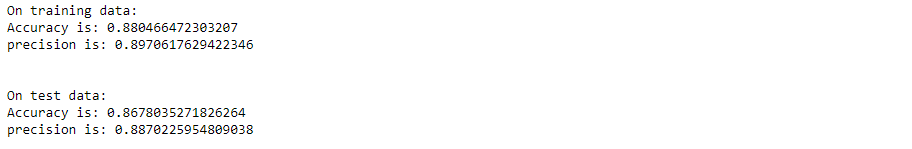

### **build Random Forest model**

In [ ]:
# build Random Forest model

mForest =  RandomForestClassifier(bootstrap=True, n_estimators=60, random_state=0, max_features = 'sqrt')

trained_forest = mForest.fit(XTrain, yTrain) 

y_pred_train = trained_forest.predict(XTrain)

print("On training data:")
print('Accuracy is:', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))
print("precision is:",metrics.precision_score(y_true = yTrain, y_pred = y_pred_train))
print('\n')

y_pred = trained_forest.predict(XTest)

print("On test data:")
print('Accuracy is:', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
print("precision is:",metrics.precision_score(y_true = yTest, y_pred = y_pred))

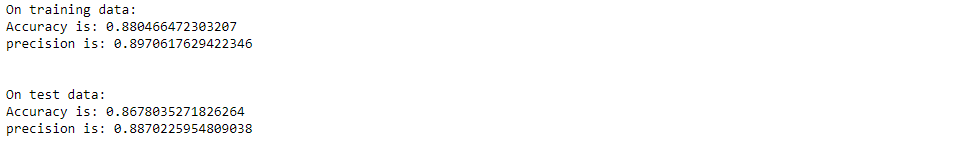